epoch158_real_B.png


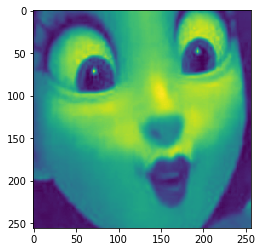

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage
import skimage.io
import skimage.filters
import skimage.color
import skimage.exposure
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

dbfolder = '/mnt/d/projects/cs230/disney_images_cropped/'
imagefile = 'real6858.jpg'

file_names = next(os.walk(dbfolder))[2]
imagefile = np.random.choice(file_names, 1, replace = False)[0]
print(imagefile)
image = skimage.color.rgb2gray(skimage.io.imread(dbfolder + imagefile))
plt.imshow(image)

In [2]:
def base_filter(img):
    filt_real, filt_image = skimage.filters.gabor(img, frequency = 0.7)
    filt_image = skimage.filters.sobel(img)
    filt_image = np.absolute(filt_image)
    #plt.imshow(filt_image)
    #max_pix = np.max(filt_image[filt_image < np.max(filt_image)])
    max_pix = np.max(filt_image)
    filt_image /= max_pix
    #filt_image[filt_image>0.5] = 0
    filt_image[filt_image>0.95] = 1
    filt_image[filt_image<0.05] = 0
    #plt.hist(filt_image)

    filt_image_rgb = skimage.color.gray2rgb(filt_image)
    return filt_image
    #plt.imshow(filt_image)
    #print(filt_image_rgb.shape)
    #print(image.shape)
    #print(type(filt_image_rgb))

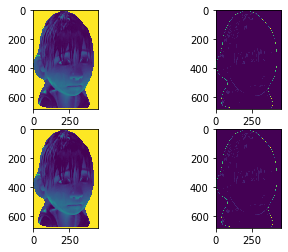

In [205]:
p2, p98 = np.percentile(image[image < 0.999], (2, 98))
img_rescale = skimage.exposure.rescale_intensity(image, in_range=(p2, p98))
#img_rescale = skimage.exposure.equalize_adapthist(image, clip_limit=0.01)
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(base_filter(image))
plt.subplot(2,2,3)
plt.imshow(img_rescale)
plt.subplot(2,2,4)
plt.imshow(base_filter(img_rescale))

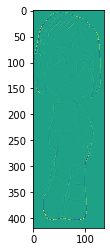

In [19]:
laplace_image = skimage.filters.laplace(image, ksize=5)
plt.imshow(laplace_image)

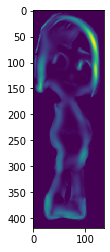

In [34]:
frangi_image = skimage.filters.frangi(image)
plt.imshow(frangi_image)

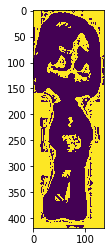

In [35]:
hessian_image = skimage.filters.hessian(image)
plt.imshow(hessian_image)